In [24]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.metrics import normalized_mutual_info_score
from pylineaGT.simulations import Simulate
from pylineaGT.run import run_inference, single_run
from pylineaGT.nbmm import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Axes: ylabel='Frequency'>

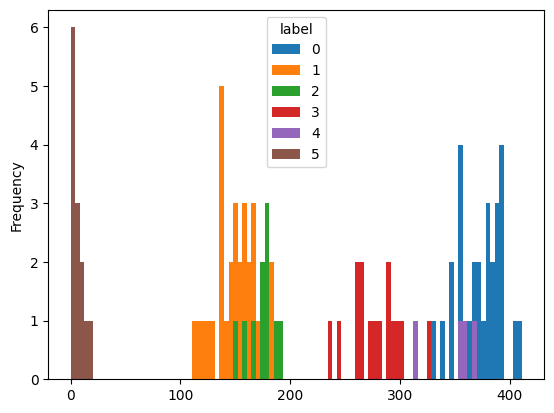

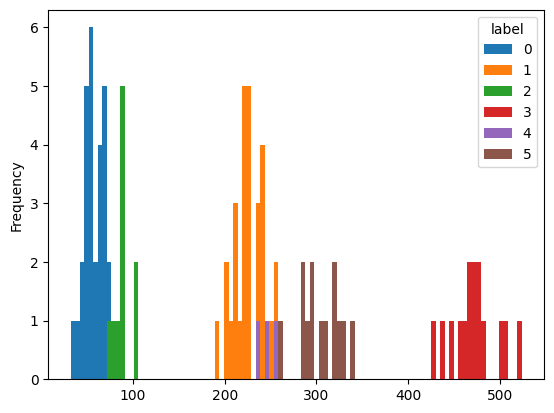

In [25]:
obj = Simulate(seed=1, N=100, T=2, K=6, likelihood="NB", c=4., mean_loc=500, max_iter=100)
obj.generate_dataset()

cols = {0:"red", 1:"blue", 2:"green", 3:"yellow", 4:"orange", 5:"purple"}
colors = [cols[i] for i in obj.params["z"].tolist()]
df = pd.DataFrame({"x1":obj.dataset[:,0].tolist(),
                   "x2":obj.dataset[:,1].tolist(),
                #    "x3":obj.dataset[:,2].tolist(),
                #    "x4":obj.dataset[:,3].tolist(),
                   "label":obj.params["z"].tolist()})
df.pivot(columns="label", values="x1").plot.hist(bins=100)
df.pivot(columns="label", values="x2").plot.hist(bins=100)
# df.pivot(columns="label", values="x3").plot.hist(bins=100)
# df.pivot(columns="label", values="x4").plot.hist(bins=100)

ELBO 22.001338: 100%|██████████| 117/117 [00:00<00:00, 487806.73it/s]


<Axes: ylabel='Frequency'>

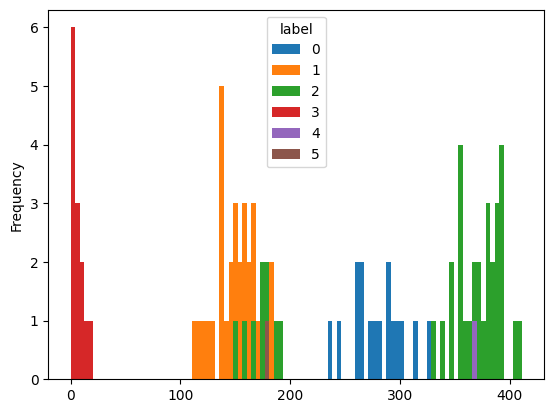

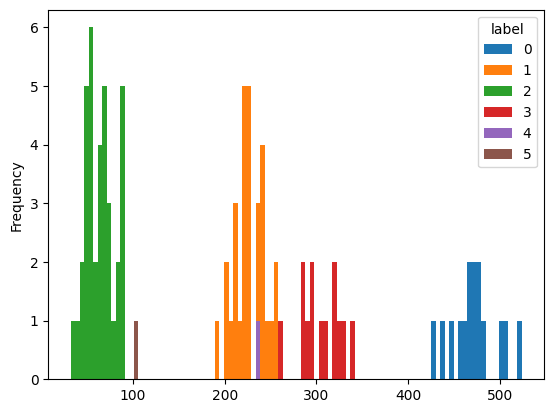

In [26]:
fit = run_inference(cov_df=obj.dataset, k_interval=[3,9], return_object=True)

cols = {0:"red", 1:"blue", 2:"green", 3:"yellow", 4:"orange", 5:"purple", 6:"red"}
colors = [cols[i] for i in fit[4].tolist()]

df = pd.DataFrame({"x1":obj.dataset[:,0].tolist(),
                   "x2":obj.dataset[:,1].tolist(),
                #    "x3":obj.dataset[:,2].tolist(),
                #    "x4":obj.dataset[:,3].tolist(),
                   "label":fit[4].tolist()})

df.pivot(columns="label", values="x1").plot.hist(bins=100)
df.pivot(columns="label", values="x2").plot.hist(bins=100)
# df.pivot(columns="label", values="x3").plot.hist(bins=100)
# df.pivot(columns="label", values="x4").plot.hist(bins=100)

In [27]:
normalized_mutual_info_score(fit[4].tolist(), obj.params["z"])

0.8860319769948013

# Negative Binomial Mixture Model

In [28]:
# lr = 0.01
# # num_steps = 1000

# pyro.clear_param_store()
# optimizer = Adam({"lr": lr})
# svi = SVI(model, guide, optimizer, loss=TraceEnum_ELBO())
# svi.step(obj.dataset, 6)
from pylineaGT.nbmm import *

X = obj.dataset
K = 6

params = fit_mixture(X, K)
post_probs, assignments = posterior_assignments(X, K, params, model)

ELBO 1232.768188: 100%|██████████| 5000/5000 [00:12<00:00, 392.59it/s]


<Axes: ylabel='Frequency'>

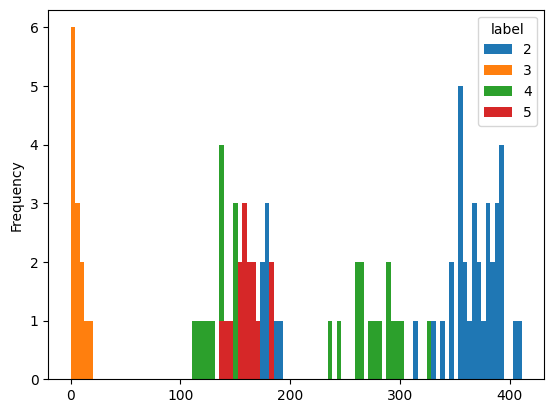

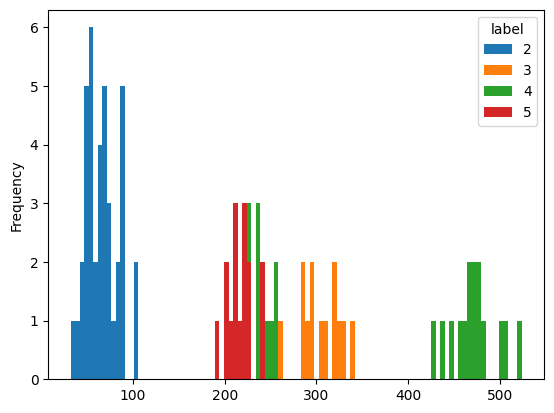

In [29]:
cols = {0:"red", 1:"blue", 2:"green", 3:"yellow", 4:"orange", 5:"purple", 6:"red"}
colors = [cols[i] for i in assignments.tolist()]

df = pd.DataFrame({"x1":obj.dataset[:,0].tolist(),
                   "x2":obj.dataset[:,1].tolist(),
                #    "x3":obj.dataset[:,2].tolist(),
                #    "x4":obj.dataset[:,3].tolist(),
                   "label":assignments.tolist()})

df.pivot(columns="label", values="x1").plot.hist(bins=100)
df.pivot(columns="label", values="x2").plot.hist(bins=100)
# df.pivot(columns="label", values="x3").plot.hist(bins=100)
# df.pivot(columns="label", values="x4").plot.hist(bins=100)